# Assignment Two:  Sentiment Classification

For this exercise you will be using the "SemEval 2017 task 4" corpus provided on the module website, available through the following link: https://warwick.ac.uk/fac/sci/dcs/teaching/material/cs918/semeval-tweets.tar.bz2 You will focus particularly on Subtask A, i.e. classifying the overall sentiment of a tweet as positive, negative or neutral.

You are requested to produce a standalone Python program or Jupyter notebook for coursework submission. The input to your program is the SemEval data downloaded. Note that TAs need to run your program on their own machine by using the original SemEval data. As such, don’t submit a Python program that takes as input some preprocessed files.

#### Import necessary packages
You may import more packages here.

In [266]:
# Import necessary packages
import re
from os.path import join
import numpy as np
import nltk

In [267]:
# Define test sets
testsets = ['twitter-test1.txt', 'twitter-test2.txt', 'twitter-test3.txt']

#### Load training set, dev set and testing set
Here, you need to load the training set, the development set and the test set. For better classification results, you may need to preprocess tweets before sending them to the classifiers.

In [268]:
# Load training set, dev set and testing set
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import glob, os   #using glob to load all the files together


file_list = [i for i in glob.glob('*.txt')]

file_list

cols = ("tweetids", "tweetgts", "tweets")  #applying column to tweet dataset  


df = pd.read_csv("twitter-dev-data.txt",sep='\t',header=None, names=cols) #reading the dataset separated by /t
print(df)
type(df)



  



                tweetids  tweetgts  \
0     262696992176304465   neutral   
1     410734138242126311  positive   
2     237615985571058688   neutral   
3      90473590077188360   neutral   
4     450236582392850660  negative   
...                  ...       ...   
1995  648550834532150634  positive   
1996   22324697041215693   neutral   
1997  885111074317866321   neutral   
1998  691260170402024265   neutral   
1999   86994211549708798   neutral   

                                                 tweets  
0     @Oirisheye Hey you! I'm gonna be in Dublin in ...  
1     Literally so excited I'm going to a Sam Smith ...  
2     @WINDmobile Will there be an option to buy the...  
3     Our Little Ms. Philippines. 👏👏👏#littleMsPhilip...  
4     @AngryRaiderFan I know. This, TPP, expanded wa...  
...                                                 ...  
1995  can it just be 5:30 tomorrow evening alREADY b...  
1996  Look for me on @GMA tomorrow at 7:34am talking...  
1997  @TheShannonBurk

pandas.core.frame.DataFrame

In [269]:
#appending the testsets to applt pre-processing techniques
  
for i in range(1,len(testsets)):
    data = pd.read_table(testsets[i], sep = '\t', header = None, names = cols)
    df2 = pd.DataFrame(data)
  

combi = df.append(df2,ignore_index = True)
#df
combi

,tweetids,tweetgts,tweets
0,262696992176304465,neutral,@Oirisheye Hey you! I'm gonna be in Dublin in ...
1,410734138242126311,positive,Literally so excited I'm going to a Sam Smith ...
2,237615985571058688,neutral,@WINDmobile Will there be an option to buy the...
3,90473590077188360,neutral,Our Little Ms. Philippines. 👏👏👏#littleMsPhilip...
4,450236582392850660,negative,"@AngryRaiderFan I know. This, TPP, expanded wa..."
...,...,...,...
4374,630513925229853632,positive,Counter-attack and UCLA reclaims the lead. It'...
4375,299455295263821698,positive,"Iker: """"When Ancelotti told me that I will pla..."
4376,172859292518711844,negative,@TheCalcioGuy Agreed. Although it seemed like ...
4377,210786191826248853,positive,Looking forward to seeing what's going to happ...


In [270]:
import regex

#Preprocessing the appended dataframe

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 
combi['tweets']=combi['tweets'].apply(str)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweets'], "@[\w]*") #removing @username
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") #removing punctuations
combi.head()
def remove_URL(combi): #removing URLs from the tweets
    x=list(combi["tidy_tweet"])
    for i in range(len(x)):
        x[i]= re.sub(r"http\S+", "",str(x[i]))
    combi['tidy_tweet']=x
    """Remove URLs from a sample string"""
    return combi
combi=remove_URL(combi)

combi.head(10)


combi["optweets"]= combi["tidy_tweet"].str.lower() 



/var/folders/8j/rq8080716fbgz8ngr42t9zdr0000gn/T/ipykernel_1240/1373455404.py:13: FutureWarning:

The default value of regex will change from True to False in a future version.



In [271]:
import nltk

nltk.download('punkt')



# import TweetTokenizer() method from nltk
from nltk.tokenize import TweetTokenizer
  
    
df1 = pd.DataFrame(combi)
df1['tokenized_tweets'] = df1.apply(lambda row: nltk.word_tokenize(row['optweets']), axis=1)
 #getting the tokenized tweets




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshuldixit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [272]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 


def remove_stopwords(txt_tokenized):
    stop_words = set(stopwords.words('english') + ['stopwords']) #You can set your custom stop words here
    txt_clean = [word for word in txt_tokenized if word not in stop_words]
    return txt_clean

#Apply it

df2 = pd.DataFrame(df1)

df2['clean_tweets'] = df2["tokenized_tweets"].apply(lambda x: remove_stopwords(x))

#removing stop words from the tweets



        

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anshuldixit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anshuldixit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Build sentiment classifiers
You need to create your own classifiers (at least 3 classifiers). For each classifier, you can choose between the bag-of-word features and the word-embedding-based features. Each classifier has to be evaluated over 3 test sets. Make sure your classifier produce consistent performance across the test sets. Marking will be based on the performance over all 5 test sets (2 of them are not provided to you).

In [273]:
import nltk
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    tl= [lemmatizer.lemmatize(w) for w in text]
    return tl




df3 = pd.DataFrame(df2)



df3['text_lemmatized'] = df3["clean_tweets"].apply(lambda x : lemmatize_text(x))

#lematized texts



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anshuldixit/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [340]:

#subsettin the dataset to get the required columns

dataset = df3[['tweetgts','text_lemmatized']]

dataset2 = dataset['text_lemmatized'].tolist()

result = [] 
for i in dataset2: 
    if i not in result: 
        result.append(i) 



dictOfWords = { i : result[i] for i in range(0, len(result) ) }  #converting the dataset into dictionary




In [275]:

#Feature Vectorization using DictVectorizer


import pandas as pd
 
from sklearn.feature_extraction import DictVectorizer #vectorizing thw tweet using tweet vectorizer
cv = DictVectorizer()

                          
 
#create dataframe
text_counts= cv.fit_transform(dictOfWords)
cv_dataframe=pd.DataFrame(text_counts.toarray(),columns = cv.get_feature_names())

bow = pd.DataFrame.transpose(cv_dataframe)
bow = bow[:4379]
bow






/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,0
0=dublin,1.0
0=february,1.0
0=gon,1.0
0=hey,1.0
0=know,1.0
...,...
1324=make,1.0
1324=par,1.0
1324=quad,1.0
1324=st,1.0


In [276]:
y = dataset['tweetgts'].values
y




array(['neutral', 'positive', 'neutral', ..., 'negative', 'positive',
       'neutral'], dtype=object)

In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,y,test_size = 0.4, stratify=y,random_state=500)




In [278]:
#Classification and Evaluation :   Naive Bayes

In [279]:
from sklearn.naive_bayes import MultinomialNB
clf3 = MultinomialNB()
clf3.fit(x_train,y_train)
y_pred4 = clf3.predict(x_test)
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred4))



ACCURACY OF THE MODEL:  0.4343607305936073


In [280]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred4))
accuracy_score(y_test,y_pred4)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       296
     neutral       0.43      1.00      0.61       761
    positive       0.00      0.00      0.00       695

    accuracy                           0.43      1752
   macro avg       0.14      0.33      0.20      1752
weighted avg       0.19      0.43      0.26      1752



/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.4343607305936073

In [281]:
y_pred2 = d8.predict(x_train)
y_pred2

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [282]:
y_pred = multinomialnb.predict(x_test)
y_pred

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype='<U8')

In [283]:
#SVM

In [284]:
from sklearn.svm import LinearSVC
clf1 = LinearSVC()



In [285]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics 
clf1.fit(x_train,y_train)
y_pred3 = clf1.predict(x_test)
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred3))




ACCURACY OF THE MODEL:  0.4343607305936073


/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [286]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred3))
accuracy_score(y_test,y_pred3)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       296
     neutral       0.43      1.00      0.61       761
    positive       0.00      0.00      0.00       695

    accuracy                           0.43      1752
   macro avg       0.14      0.33      0.20      1752
weighted avg       0.19      0.43      0.26      1752



/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.4343607305936073

In [287]:
y_pred2 = d9.predict(x_train)
y_pred2

array(['neutral', 'neutral', 'neutral', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [288]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       296
     neutral       0.43      1.00      0.61       761
    positive       0.00      0.00      0.00       695

    accuracy                           0.43      1752
   macro avg       0.14      0.33      0.20      1752
weighted avg       0.19      0.43      0.26      1752



/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/anshuldixit/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



0.4343607305936073

In [289]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 1000) 
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn import metrics 
print()
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))



ACCURACY OF THE MODEL:  0.4309360730593607


In [290]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

    negative       0.33      0.00      0.01       296
     neutral       0.43      0.96      0.60       761
    positive       0.39      0.04      0.07       695

    accuracy                           0.43      1752
   macro avg       0.38      0.33      0.22      1752
weighted avg       0.40      0.43      0.29      1752



0.4309360730593607

In [291]:
#LSTM

In [292]:

#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

import re
import os
import time

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(103)
torch.cuda.manual_seed(103)
np.random.seed(103)

deviceCount = torch.cuda.device_count()
print(deviceCount)

cuda0 = None
if deviceCount > 0:
  print(torch.cuda.get_device_name(0))
  cuda0 = torch.device('cuda:0')

0


/var/folders/8j/rq8080716fbgz8ngr42t9zdr0000gn/T/ipykernel_1240/1018630084.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



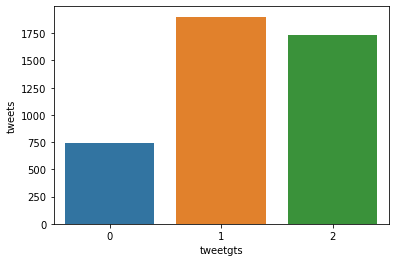

In [383]:
sns.countplot(x='tweetgts', data=dataset)
plt.gca().set_ylabel('tweets')
dataset['tweetgts'] = dataset['tweetgts'].replace({'negative':0, 'neutral':1, 'positive':2})

In [342]:
text_embedding_dimension = 200
key_embedding_dimension = 25


path_to_glove_file = 'glove.6B.100d.txt'.format(text_embedding_dimension)

embeddings_index_200 = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index_200[word] = coefs

print("Found %s word vectors." % len(embeddings_index_200))



path_to_glove_file = 'glove.6B.100d.txt'.format(key_embedding_dimension)

embeddings_index_25 = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index_25[word] = coefs

print("Found %s word vectors." % len(embeddings_index_25))

Found 400000 word vectors.
Found 400000 word vectors.


In [343]:
#Exploratory Data Analysis and Further Text Cleaning
#Finding the Words which are Unknown to GloVe


unknown_words = []
total_words = 0

def find_unknown_words(words):
    
    global total_words
    total_words = total_words + len(words)
    
    for word in words:
        if not (word in embeddings_index_200):
            unknown_words.append(word)
    
    return words


dataset['text_lemmatized'].apply(lambda words: find_unknown_words(words))

print( f'{len(unknown_words)/total_words}')

print( f'{len(unknown_words)/total_words*100:5.2} % of words are unknown' )


0.05894129747997943
  5.9 % of words are unknown


In [344]:
def analyze_unknown_words(unknown_words):
    
    unknown_words = np.array(unknown_words)
    (word, count) = np.unique(unknown_words, return_counts=True)
    
    word_freq = pd.DataFrame({'word': word, 'count': count}).sort_values('count', ascending=False)

    fig = go.Figure(data=[go.Table(
          header=dict(values=list(word_freq.columns),
                    fill_color='paleturquoise',
                    align='left'),
          cells=dict(values=[word_freq['word'], word_freq['count']],
                    fill_color='lavender',
                    align='left'))
          ])
    fig.update_layout(width=300, height=300, margin={'b':0, 'l':0, 'r':0, 't':0, 'pad':0})
    fig.show()
        
analyze_unknown_words(unknown_words)

In [345]:

contractions  = { "i'm" : "i am", "it's" : "it is", "don't" : "do not", "can't" : "cannot", 
                  "you're" : "you are", "that's" : "that is", "we're" : "we are", "i've" : "i have", 
                  "he's" : "he is", "there's" : "there is", "i'll" : "i will", "i'd" : "i would", 
                  "doesn't" : "does not", "what's" : "what is", "didn't" : "did not", 
                  "wasn't" : "was not", "hasn't" : "has not", "they're" : "they are", 
                  "let's" : "let us", "she's" : "she is", "isn't" : "is not", "ain't" : "not", 
                  "aren't" : "are not", "haven't" : "have not", "you'll" : "you will", 
                  "we've" : "we have", "you've" : "you have", "y'all" : "you all", 
                  "weren't" : "were not", "couldn't" : "could not", "would've" : "would have", 
                  "they've" : "they have", "they'll" : "they will", "you'd" : "you would", 
                  "they'd" : "they would", "it'll" : "it will", "where's" : "where is", 
                  "we'll" : "we will", "we'd" : "we would", "he'll" : "he will", 
                  "gov't" : "government", "shouldn't" : "should not", "bioterror" : "biological terror", 
                  "bioterrorism" : "biological terrorism", "wouldn't" : "would not", 
                  "won't" : "will not" }


def expand_contractions(words):
    
    for i in range(len(words)):
        if words[i] in contractions:
            words[i] = contractions[words[i]]
            
    return (' '.join(words)).split()


# precautionary cleaning for any remaing apostrophes
def remove_apostrophes(words):
    words = ' '.join(words)
    words = re.sub("'", '', words)
    return words.split()


dataset['text_lemmatized'] = dataset['text_lemmatized'].apply(lambda words: expand_contractions(words))

dataset['text_lemmatized'] = dataset['text_lemmatized'].apply(lambda words: remove_apostrophes(words))

/var/folders/8j/rq8080716fbgz8ngr42t9zdr0000gn/T/ipykernel_1240/2886251487.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/8j/rq8080716fbgz8ngr42t9zdr0000gn/T/ipykernel_1240/2886251487.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [346]:
unknown_words = []
total_words = 0

dataset['text_lemmatized'].apply(lambda words: find_unknown_words(words))

print( f'{len(unknown_words)/total_words*100:5.2} % of words are unknown' )

  5.9 % of words are unknown


In [347]:
words_freq = {}

def word_frequency(words):
  for word in words:
    if word in words_freq:
      words_freq[word] += 1
    else:
      words_freq[word] = 1

dataset['text_lemmatized'].apply(lambda words: word_frequency(words))

word = []
count = []
for w in words_freq:
  word.append(w)
  count.append( words_freq[w] )

word = np.array(word)
count = np.array(count)

word_freq = pd.DataFrame({'word': word, 'count': count}).sort_values('count', ascending=False)

fig = go.Figure(data=[go.Table(
      header=dict(values=list(word_freq.columns),
                fill_color='paleturquoise',
                align='left'),
      cells=dict(values=[word_freq['word'], word_freq['count']],
                fill_color='lavender',
                align='left'))
      ])
fig.update_layout(width=300, height=300, margin={'b':0, 'l':0, 'r':0, 't':0, 'pad':0})
fig.show()

In [348]:
stop_words = [ 'the', 'a', 'in', 'to', 'of', 'i', 'and', 'is', 'you', 'for', 'on', 'it', 'my', 'that',
               'with', 'are', 'at', 'by', 'this', 'have', 'from', 'be', 'was', 'do', 'will', 'as', 'up', 
               'me', 'am', 'so', 'we', 'your', 'has', 'when', 'an', 's', 'they', 'about', 'been', 'there',
               'who', 'would', 'into', 'his', 'them', 'did', 'w', 'their', 'm', 'its', 'does', 'where', 'th',
               'b', 'd', 'x', 'p', 'o', 'r', 'c', 'n', 'e', 'g', 'v', 'k', 'l', 'f', 'j', 'z', 'us', 'our',
               'all', 'can', 'may' ] 

def remove_stop_words(words):
  result = []
  for word in words:
    if not (word in stop_words):
      result.append(word)
  return result

dataset['text_lemmatized'] = dataset['text_lemmatized'].apply(lambda words: remove_stop_words(words))

/var/folders/8j/rq8080716fbgz8ngr42t9zdr0000gn/T/ipykernel_1240/2719595231.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [349]:
#Embedding the Text and Keyword

def text_embed(words):
    
    unknown_indices = []
    mean = np.zeros(text_embedding_dimension)
    
    for i in range(len(words)):
        if words[i] in embeddings_index_200:
            words[i] = embeddings_index_200[ words[i] ]
            mean += words[i]
        else:
            unknown_indices.append(i)
            
    mean /= len(words)-len(unknown_indices)
    
    # unknown words in the text are represented using the mean of the known words
    for i in unknown_indices:
        words[i] = mean
    
    return np.array(words)



In [350]:
class LSTMnetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_size = 50
        self.input_size = text_embedding_dimension
        self.num_layers = 1
        self.bidirectional = True
        self.num_directions = 1
        self.dropout1 = nn.Dropout(p=0.3)

        if self.bidirectional:
            self.num_directions = 2
 
        self.lstm = nn.LSTM( self.input_size, self.hidden_size, self.num_layers, 
                             bidirectional=self.bidirectional )
        
        self.linear = nn.Linear(self.hidden_size*self.num_directions,1)

    def forward(self, tweet):
        
        lstm_out, _ = self.lstm( tweet.view(len(tweet), 1, -1) )

        x = self.dropout1( lstm_out.view(len(tweet),-1) )
        
        output = self.linear(x)
        
        pred = torch.sigmoid( output[-1] )
        
        return pred

In [351]:
def keyword_embed(keyword, text):
    
    if pd.isna(keyword):
        keyword = np.zeros(25)
    else:
        keyword = keyword.lower()
        keyword = re.sub("[^a-z ]+", ' ', keyword)
        keywords = keyword.split()

        if len(keywords) == 0:
            keyword = np.zeros(key_embedding_dimension)
        else:
            keyword = np.zeros(key_embedding_dimension)
            word_count = 0
            for word in keywords:
                if word in embeddings_index_25:
                    keyword += embeddings_index_25[word]
                    word_count += 1

            if word_count > 0:
                keyword = keyword / word_count
 
    return keyword



In [352]:
#Train and Cross Validation Split

# cross_validation_ratio = 0.2
cross_validation_ratio = 0.05

mask = np.random.rand(len(df)) > cross_validation_ratio

train_df = df[mask]

val_df = df[~mask]

In [353]:
class LSTMnetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_size = 50
        self.input_size = text_embedding_dimension
        self.num_layers = 1
        self.bidirectional = True
        self.num_directions = 1
        self.dropout1 = nn.Dropout(p=0.3)

        if self.bidirectional:
            self.num_directions = 2
 
        self.lstm = nn.LSTM( self.input_size, self.hidden_size, self.num_layers, 
                             bidirectional=self.bidirectional )
        
        self.linear = nn.Linear(self.hidden_size*self.num_directions,1)

    def forward(self, tweet):
        
        lstm_out, _ = self.lstm( tweet.view(len(tweet), 1, -1) )

        x = self.dropout1( lstm_out.view(len(tweet),-1) )
        
        output = self.linear(x)
        
        pred = torch.sigmoid( output[-1] )
        
        return pred

In [354]:
lstm_model = LSTMnetwork()

if cuda0 != None:
  lstm_model.to(cuda0)

criterion_text = nn.BCELoss()
optimizer_text = torch.optim.Adam(lstm_model.parameters(), lr=0.001)   #applying the adam optimizer
scheduler_text = torch.optim.lr_scheduler.ExponentialLR(optimizer_text, gamma=0.1)

In [355]:
lstm_model


LSTMnetwork(
  (dropout1): Dropout(p=0.3, inplace=False)
  (lstm): LSTM(200, 50, bidirectional=True)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

In [356]:
cross_validation_ratio = 0.05

mask = np.random.rand(len(dataset)) < cross_validation_ratio

train_df = dataset[mask]

val_df = dataset[~mask]

In [397]:
import nltk
from nltk.tokenize import word_tokenize
tokenizer = word_tokenize
from tokenize import tokenize, untokenize, NUMBER, STRING, NAME, OP

x_train_text = train_df['text_lemmatized'].values
x_train_key = train_df['tweetgts'].values

x_val_text = val_df['text_lemmatized'].values
x_val_key = val_df['tweetgts'].values

y_train = train_df['text_lemmatized'].values
y_val = val_df['tweetgts'].values



In [398]:
x_train_key = np.array( [i for i in x_train_key] ).resize(4379, key_embedding_dimension)
x_val_key = np.array( [i for i in x_val_key] ).resize(4379, key_embedding_dimension)

In [399]:
start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(4):  

    epoch_start_time = time.time()

    print('Epoch : {}'.format(epoch+1))

    trainLoss = 0
    correct = 0

    lstm_model.train()

    for i in range(len(x_train_text)):

        lstm_model.zero_grad()

        tweet = torch.FloatTensor(x_train_text[i])
        label = torch.FloatTensor(np.array([y_train[i]]) )

        if cuda0 != None:
            tweet = tweet.cuda()
            label = label.cuda()

        pred = lstm_model(tweet)

        loss = criterion_text(pred, label)

        lambdaParam = torch.tensor(0.001)
        l2_reg = torch.tensor(0.)

        if cuda0 != None:
          lambdaParam = lambdaParam.cuda()
          l2_reg = l2_reg.cuda() 

        for param in lstm_model.parameters():
          if cuda0 != None:
            l2_reg += torch.norm(param).cuda()
          else:
            l2_reg += torch.norm(param)

        loss += lambdaParam * l2_reg

        pred = pred.item()*lstm_model_weight + pred_train_key[i].item()*ann_model_weight
        
        if pred > 0.5:
            pred = 1
        else:
            pred = 0

        if pred == int( label.item() ):
            correct += 1

        trainLoss += loss.item()

        optimizer_text.zero_grad()
        loss.backward()
        optimizer_text.step()

        if (i+1)%1000 == 0:
            print('Processed {} tweets out of {}'.format(i+1, len(x_train_text)))

    train_losses.append(trainLoss/len(x_train_text))
    train_accuracies.append( correct/len(x_train_text)
    valLoss = 0
    correct = 0

    lstm_model.eval()

    with torch.no_grad():

        for i in range(len(x_val_text)):

            tweet = torch.FloatTensor(x_val_text[i])
            label = torch.FloatTensor( np.array([y_val[i]]) )

            if cuda0 != None:
                tweet = tweet.cuda()
                label = label.cuda()

            pred = lstm_model( tweet )

            loss = criterion_text(pred, label)

            valLoss += loss.item()

            pred = pred.item()*lstm_model_weight + pred_val_key[i].item()*ann_model_weight

            if pred > 0.5:
                pred = 1
            else:
                pred = 0

            if pred == int( label.item() ):
                correct += 1

    val_losses.append(valLoss/len(x_val_text))
    val_accuracies.append( correct/len(x_val_text) )

    print('Epoch Summary:')
    print(f'Train Loss: {train_losses[-1]:7.2f}  Train Accuracy: {train_accuracies[-1]*100:6.3f}%')
    print(f'Validation Loss: {val_losses[-1]:7.2f}  Validation Accuracy: {val_accuracies[-1]*100:6.3f}%')
    print(f'Duration: {time.time() - epoch_start_time:.0f} seconds')
    print('')

    scheduler_text.step()

print(f'\nDuration: {time.time() - start_time:.0f} seconds')

SyntaxError: invalid syntax (327690217.py, line 70)